TASK-3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier

In [2]:
df=pd.read_csv("Dataset .csv")# read data

In [3]:
df=df.dropna()# handling missing values

In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
le=LabelEncoder() #encoder for categorical data
df["City_encoded"]=le.fit_transform(df["City"])
df["Has Table booking_encoded"]=df["Has Table booking"].map({"Yes":1, "No":0})
df["Has Online delivery_encoded"]=df["Has Online delivery"].map({"Yes":1, "No":0})
df["Cuisines"] = df["Cuisines"].apply(lambda x: [c.strip() for c in x.split(",")])

In [6]:
features = ["City_encoded", "Price range", "Has Online delivery_encoded", "Has Table booking_encoded", "Votes"]
mlb = MultiLabelBinarizer() # used where there are multiple labels for a single value
X = df[features]
y = pd.DataFrame(mlb.fit_transform(df["Cuisines"]), columns=mlb.classes_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#splitting the data into training and testing sets

In [8]:
scaler = StandardScaler()# scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = OneVsRestClassifier(RandomForestClassifier(random_state=42))
model.fit(X_train_scaled, y_train)

d:\Projects\Cognifyz\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 26 is present in all training examples.
  warnings.warn(
d:\Projects\Cognifyz\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 105 is present in all training examples.
  warnings.warn(
d:\Projects\Cognifyz\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 107 is present in all training examples.
  warnings.warn(


OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

In [10]:
y_pred = model.predict(X_test_scaled)

In [11]:
report = classification_report(y_test, y_pred, target_names=mlb.classes_, output_dict=True)# entire report 
report_df = pd.DataFrame(report).transpose()
report_df

d:\Projects\Cognifyz\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Projects\Cognifyz\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Projects\Cognifyz\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Projects\Cognifyz\.venv\Lib\site

,precision,recall,f1-score,support
Afghani,0.000000,0.000000,0.000000,4.0
African,0.000000,0.000000,0.000000,3.0
American,0.128205,0.068493,0.089286,73.0
Andhra,0.000000,0.000000,0.000000,2.0
Arabian,0.000000,0.000000,0.000000,2.0
...,...,...,...,...
World Cuisine,0.000000,0.000000,0.000000,1.0
micro avg,0.371341,0.180209,0.242658,4012.0
macro avg,0.076431,0.028380,0.039181,4012.0
weighted avg,0.308666,0.180209,0.222334,4012.0


In [12]:
#user input
sample = pd.DataFrame({
    "City_encoded": [75],
    "Price range": [2],
    "Has Online delivery_encoded": [1],
    "Has Table booking_encoded": [0],
    "Votes": [200]
})

sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)
print("Predicted Cuisines:", mlb.inverse_transform(pred))


Predicted Cuisines: [('Cafe', 'Fast Food', 'Italian')]


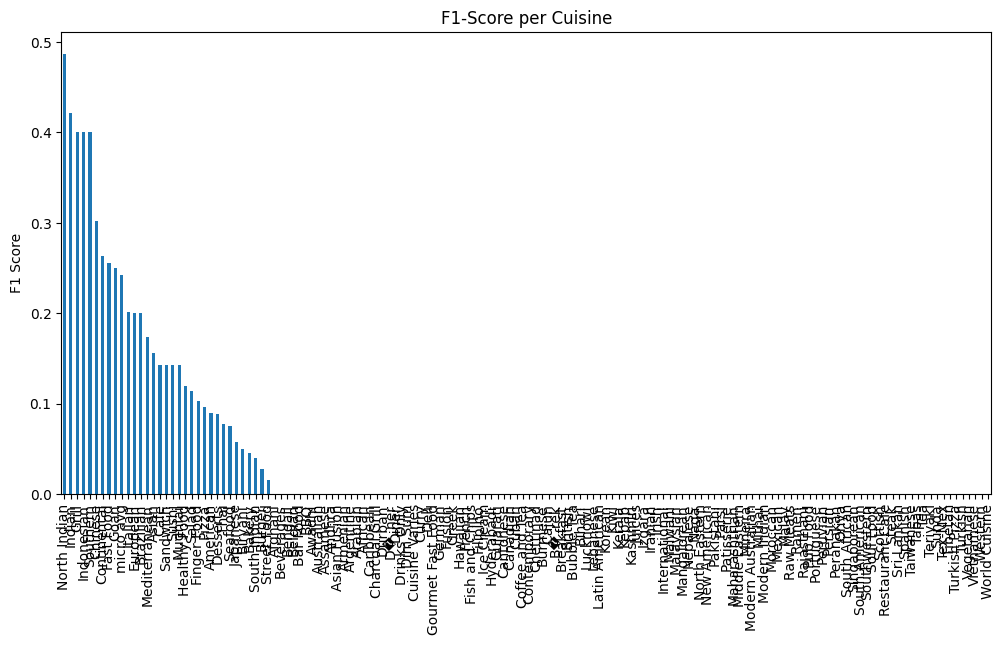

In [13]:
# F1-score per cuisine
report_df = report_df[:-3]  # will remove avg/total rows
report_df.sort_values("f1-score", ascending=False)["f1-score"].plot(kind="bar", figsize=(12,6))
plt.title("F1-Score per Cuisine")
plt.ylabel("F1 Score")
plt.show()

by looking over graph we can conclude that

Some challenges and biases are Class imbalance like popular cuisines appear much and rare cuisines don't appear enough so, this is bias towards majority classes.

Since it's a multi-label classification task restaurants can have multiple cuisines, rare cuisine combinations may not occur often enough to train on, this means fewer learning opportunities.
